<a href="https://colab.research.google.com/github/DrakeJay/kardia/blob/main/kardia_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#torch stuff
import torch
import torch.nn as nn
import torch.optim as optim


#python openvision
#https://docs.opencv.org/4.x/dc/d84/group__core__basic.html
import cv2

#look into torch visio
'''
https://docs.pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py
'''
#for navigating/reading files
import os
print("Import done")

Import done


In [3]:

Train_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train'
#print(Train)

Test_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/test'
#print(Test)

Train_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train.csv'
#print(Train_data)

Test_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/test.csv'
#print(Test_data)

In [27]:
Test_csv
Train_csv

'/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train.csv'

In [10]:
Train_data = pd.read_csv(Train_csv)

display(Train_data.head())

display(Train_data.info())

Train_data.describe()

,id,fs,sig_len
0,7663343,500,5000
1,10140238,1000,10000
2,11842146,1000,10000
3,19030958,250,2500
4,19585145,512,5120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       977 non-null    int64
 1   fs       977 non-null    int64
 2   sig_len  977 non-null    int64
dtypes: int64(3)
memory usage: 23.0 KB


None

,id,fs,sig_len
count,9.770000e+02,977.000000,977.000000
mean,2.143116e+09,590.055271,5900.552712
std,1.296314e+09,315.892515,3158.925149
min,7.663343e+06,250.000000,2500.000000
25%,9.720851e+08,256.000000,2560.000000
50%,2.112147e+09,500.000000,5000.000000
75%,3.316191e+09,1000.000000,10000.000000
max,4.292119e+09,1025.000000,10250.000000


In [38]:

image_folder_path = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/'
folder_csv = '/content/drive/MyDrive/kaggle_data/competitions/physionet-ecg-image-digitization/train/1006427285/1006427285.csv'

#enumerate/loop for the image files
#need just the png files f.endswith('.png')
image_files = [f for f in os.listdir(image_folder_path)

                 if os.path.isfile(os.path.join(image_folder_path, f))
                  and f.endswith('.png')]

print(image_files) #so reading the file name works, throw them into a image reader or whatever it is called

['1006427285-0005.png', '1006427285-0012.png', '1006427285-0009.png', '1006427285-0011.png', '1006427285-0010.png', '1006427285-0001.png', '1006427285-0004.png', '1006427285-0003.png', '1006427285-0006.png']


In [43]:
#info of the that specific folder of images, Figure out what columns represent exactly
folder_info = pd.read_csv(folder_csv)
folder_info.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,0.019,0.085,0.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011,0.078,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.019,0.084,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.024,0.088,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.020,0.085,0.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


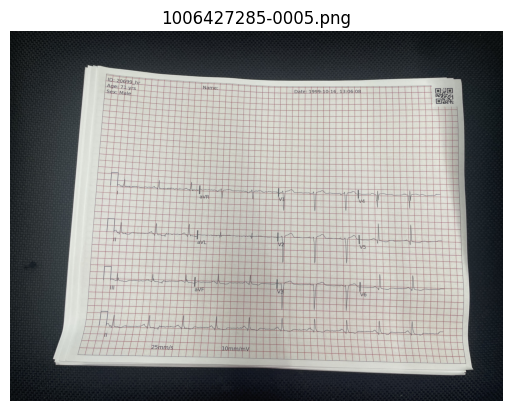

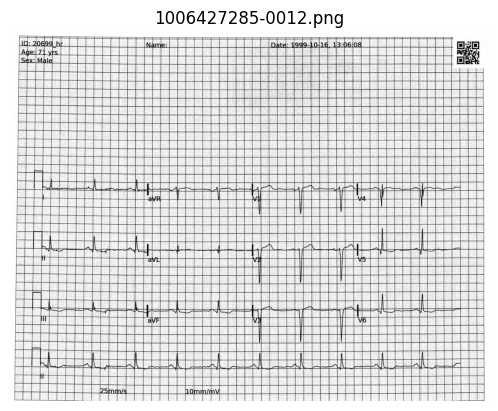

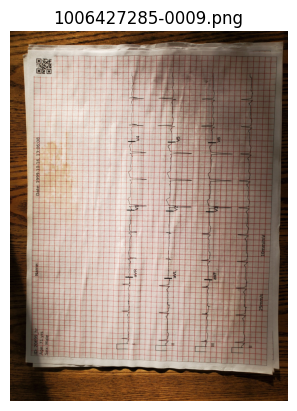

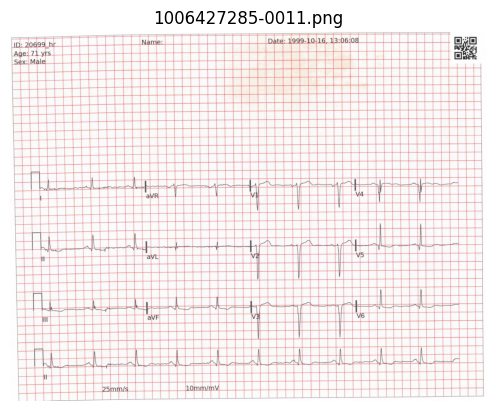

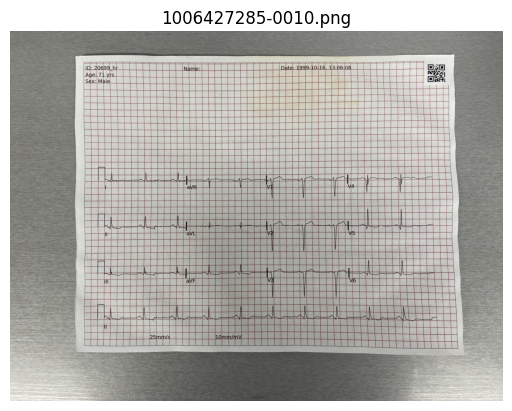

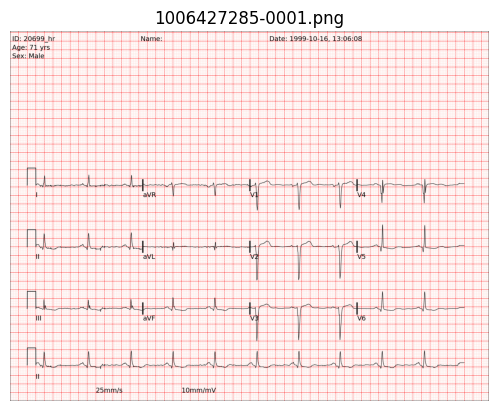

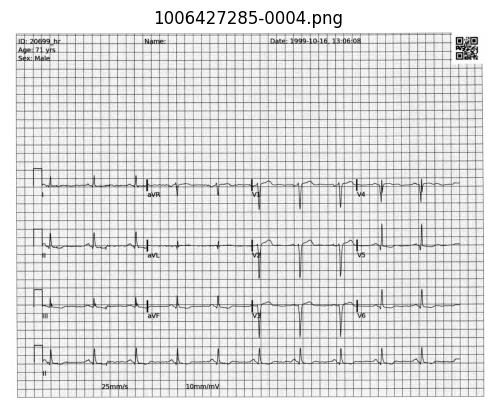

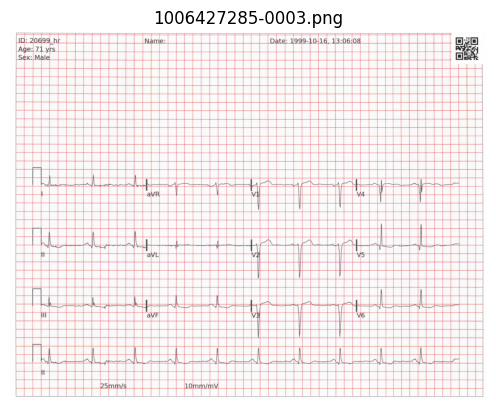

Could not load/show this: 1006427285-0006.png


In [46]:
#use cv2 to read from image path

for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    img = cv2.imread(image_path)

    # one of the images is giving an error trying to load or code bug idk, investigate
    #check if my file is corrupt..... or it is not working in the dataset normally
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(image_file)
        plt.axis('off')
        plt.show()


    else:
        print(f"Could not load/show this: {image_file}")